In [60]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [61]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [62]:
#Unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [64]:
#Generator
#For training of dataset
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', #For cat --> 0  and dog --> 1
    batch_size = 32, #Dividing large datasets into 32 batches
    image_size = (256, 256) #Resizing of diff Pictures
) # -> (Here 20000 data are found out of two classes)

#For Validation of dataset
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', #For cat --> 0  and dog --> 1
    batch_size = 32, #Dividing large datasets into 32 batches
    image_size = (256, 256) #Resizing of diff Pictures
) # -> (Here 5000 data are found out of two classes)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [65]:
#Normalize ( As the dataset is stored in numpy format which is 0-255 so we need to narrow it down to 0-1 [only two bands])
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [66]:
#CNN Architecture Creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu')) #128 Neurons
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu')) #64 Neurons
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #1 Neurons

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [68]:
#Compilation of Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
#Running the model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.5704 - loss: 2.4557 - val_accuracy: 0.6410 - val_loss: 0.6769
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 78ms/step - accuracy: 0.6827 - loss: 0.5993 - val_accuracy: 0.6970 - val_loss: 0.5715
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7636 - loss: 0.4939 - val_accuracy: 0.6042 - val_loss: 0.7111
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.7800 - loss: 0.4684 - val_accuracy: 0.7868 - val_loss: 0.4589
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8289 - loss: 0.3834 - val_accuracy: 0.7552 - val_loss: 0.4918
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8626 - loss: 0.3164 - val_accuracy: 0.6988 - val_loss: 0.5862
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8934 - loss: 0.2595 - val_accuracy: 0.7982 - val_loss: 0.4514
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9229 - loss: 0.1872 - 

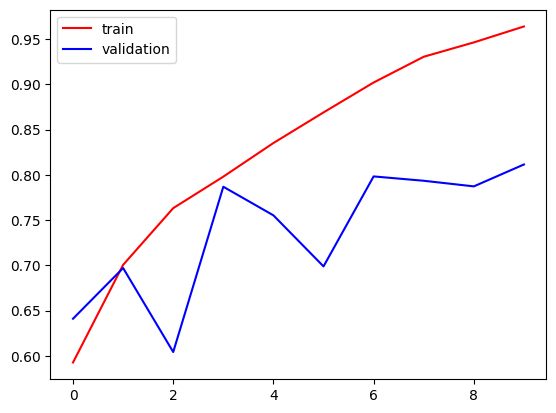

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

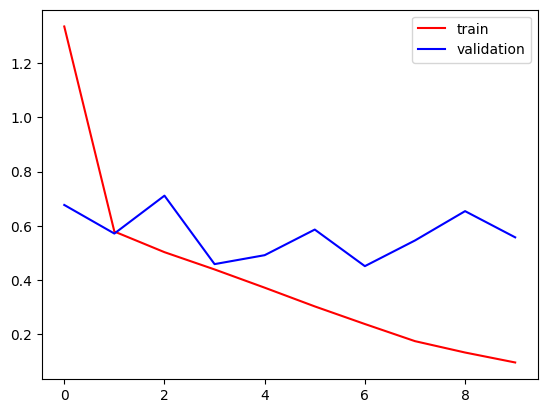

In [71]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [112]:
import cv2
import matplotlib.pyplot as plt

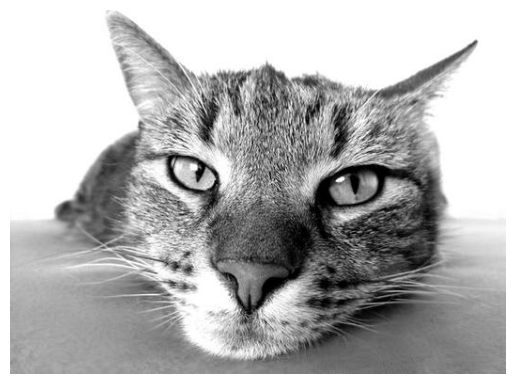

In [125]:
test_image = cv2.imread('/content/catty.jpg')  # Change path if needed
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plt
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [126]:
test_image = cv2.resize(test_image, (256, 256))
test_input = test_image.reshape((1, 256, 256, 3))
test_input = test_input / 255.0  # Normalize just like in training

In [127]:
prediction = model.predict(test_input)
print("Prediction Score:", prediction[0][0])

if prediction[0][0] >= 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction Score: 0.000496478
Predicted: Cat
